In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline() 

In [5]:
pd.options.display.float_format= '{:.2f}'.format

In [46]:
pd.set_option('display.max_rows',None)

# IMPORTING DATASET


In [6]:
df = pd.read_csv(r'C:\Users\cecel\OneDrive\Desktop\Data Analytics Softwares\Python\Projects\archive\covid_19_data.csv')

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [8]:
df.shape

(172480, 8)

In [9]:
df.rename(columns = {'Country/Region':'Country'},inplace = True)
df.rename(columns = {'ObservationDate':'Date'},inplace = True)
df.rename(columns = {'Province/State':'State'},inplace = True)

In [10]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [11]:
df.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.00,337.00,6556.00
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.00,104.00,0.00
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.00,1.00,1288.00
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.00,531.00,22263.00
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.00,2414.00,0.00


# Data Analysis



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   State        124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [13]:
df.isnull().sum()

SNo                0
Date               0
State          47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [14]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [15]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [16]:
confirmed

,Date,Confirmed
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00
...,...,...
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00


In [17]:
death = df.groupby('Date').sum()['Deaths'].reset_index()

In [18]:
Recovery = df.groupby('Date').sum()['Recovered'].reset_index()

In [19]:
death

,Date,Deaths
0,01/22/2020,17.00
1,01/23/2020,18.00
2,01/24/2020,26.00
3,01/25/2020,42.00
4,01/26/2020,56.00
...,...,...
315,12/02/2020,1493742.00
316,12/03/2020,1506260.00
317,12/04/2020,1518670.00
318,12/05/2020,1528868.00


In [20]:
Recovery

,Date,Recovered
0,01/22/2020,28.00
1,01/23/2020,30.00
2,01/24/2020,36.00
3,01/25/2020,39.00
4,01/26/2020,52.00
...,...,...
315,12/02/2020,41496318.00
316,12/03/2020,41932091.00
317,12/04/2020,42352021.00
318,12/05/2020,42789879.00


In [21]:

Recovery.head()

,Date,Recovered
0,01/22/2020,28.00
1,01/23/2020,30.00
2,01/24/2020,36.00
3,01/25/2020,39.00
4,01/26/2020,52.00


<AxesSubplot:xlabel='Date'>

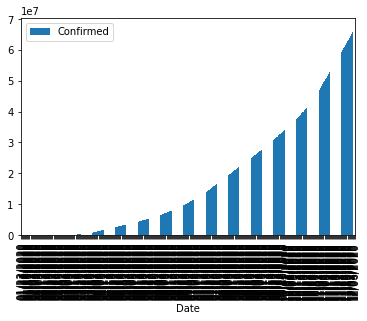

In [22]:
#Matplotlib
confirmed.plot(kind='bar',x='Date',y='Confirmed')

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

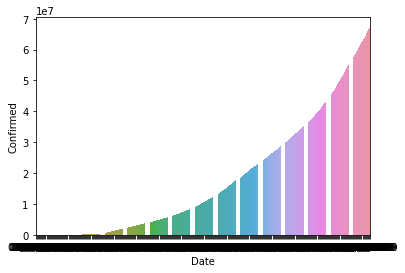

In [23]:
#Seaborn
sns.barplot(x=confirmed['Date'],y =confirmed['Confirmed'])

In [24]:
#Plotly
confirmed.iplot(kind='bar', x='Date', y='Confirmed')

In [25]:
death.iplot(kind='bar', x='Date', y='Deaths')

In [26]:
Recovery.iplot(kind='bar', x='Date', y='Recovered')

# Prediction of the Model


In [27]:
from fbprophet import Prophet

In [28]:
from fbprophet import Prophet

In [29]:
confirmed.tail()

,Date,Confirmed
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00
319,12/06/2020,67073728.00


In [30]:
death.tail()

,Date,Deaths
315,12/02/2020,1493742.00
316,12/03/2020,1506260.00
317,12/04/2020,1518670.00
318,12/05/2020,1528868.00
319,12/06/2020,1536056.00


In [32]:
Recovery.tail()

,Date,Recovered
315,12/02/2020,41496318.00
316,12/03/2020,41932091.00
317,12/04/2020,42352021.00
318,12/05/2020,42789879.00
319,12/06/2020,43103827.00


In [33]:
#date = ds(datestamp, column=y)

# Confirmed Cases

In [35]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00
...,...,...
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00


In [36]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
#Make More DateStamps
future=model.make_future_dataframe(periods=30)
future

    

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
345,2021-01-01
346,2021-01-02
347,2021-01-03
348,2021-01-04


In [38]:
future.tail(35)

,ds
315,2020-12-02
316,2020-12-03
317,2020-12-04
318,2020-12-05
319,2020-12-06
320,2020-12-07
321,2020-12-08
322,2020-12-09
323,2020-12-10
324,2020-12-11


In [39]:
forecast_confirmed = model.predict(future)

In [40]:
forecast_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-43632.78,-977852.24,865855.26,-43632.78,-43632.78,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,0.00,0.00,0.00,-63006.01
1,2020-01-23,-39804.26,-900043.29,881495.33,-39804.26,-39804.26,4472.16,4472.16,4472.16,4472.16,4472.16,4472.16,0.00,0.00,0.00,-35332.10
2,2020-01-24,-35975.74,-922556.47,851291.44,-35975.74,-35975.74,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,893.66
3,2020-01-25,-32147.22,-895437.45,855136.64,-32147.22,-32147.22,42297.29,42297.29,42297.29,42297.29,42297.29,42297.29,0.00,0.00,0.00,10150.06
4,2020-01-26,-28318.70,-946174.68,894680.07,-28318.70,-28318.70,16366.25,16366.25,16366.25,16366.25,16366.25,16366.25,0.00,0.00,0.00,-11952.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-01-01,78391405.73,76258801.56,80343817.19,76315234.46,80008533.41,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,78428275.13
346,2021-01-02,78891699.41,76667976.83,80625216.42,76702396.94,80590327.34,42297.29,42297.29,42297.29,42297.29,42297.29,42297.29,0.00,0.00,0.00,78933996.70
347,2021-01-03,79391993.09,76933137.27,81529524.87,77090374.99,81225181.20,16366.25,16366.25,16366.25,16366.25,16366.25,16366.25,0.00,0.00,0.00,79408359.34
348,2021-01-04,79892286.77,77399337.22,81832386.57,77478353.04,81822114.55,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,0.00,0.00,0.00,79852806.93


In [43]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
310,2020-11-27,60917996.41,60034497.48,61820065.75
311,2020-11-28,61423717.97,60515583.84,62372519.07
312,2020-11-29,61898080.61,61025176.17,62815795.25
313,2020-11-30,62342528.20,61474571.68,63171656.99
314,2020-12-01,62841149.69,61951931.21,63693444.58
315,2020-12-02,63363222.17,62397132.85,64224337.37
316,2020-12-03,63887361.24,62951965.54,64793460.31
317,2020-12-04,64420052.15,63477075.01,65370987.44
318,2020-12-05,64925773.71,64034981.93,65828618.32
319,2020-12-06,65400136.36,64492678.63,66346644.67


In [48]:
future=model.make_future_dataframe(periods=90)
future


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [47]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
250,2020-09-28,32422679.58,31478925.25,33319393.72
251,2020-09-29,32601570.45,31665500.10,33566450.17
252,2020-09-30,32803912.32,31926562.36,33695477.67
253,2020-10-01,33008320.76,32121106.31,33938897.81
254,2020-10-02,33221281.06,32392917.42,34153594.40
255,2020-10-03,33407272.01,32505369.99,34323411.93
256,2020-10-04,33881634.65,32964435.87,34776302.84
257,2020-10-05,34326082.24,33432133.53,35234941.05
258,2020-10-06,34824703.72,33900280.07,35731751.96
259,2020-10-07,35346776.21,34415315.19,36240215.36


In [49]:
forecast_confirmed = model.predict(future)


In [50]:
forecast_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-43632.78,-964988.02,823708.28,-43632.78,-43632.78,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,0.00,0.00,0.00,-63006.01
1,2020-01-23,-39804.26,-1004657.41,872077.32,-39804.26,-39804.26,4472.16,4472.16,4472.16,4472.16,4472.16,4472.16,0.00,0.00,0.00,-35332.10
2,2020-01-24,-35975.74,-882641.57,922821.31,-35975.74,-35975.74,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,893.66
3,2020-01-25,-32147.22,-919954.75,952282.41,-32147.22,-32147.22,42297.29,42297.29,42297.29,42297.29,42297.29,42297.29,0.00,0.00,0.00,10150.06
4,2020-01-26,-28318.70,-933281.17,936639.73,-28318.70,-28318.70,16366.25,16366.25,16366.25,16366.25,16366.25,16366.25,0.00,0.00,0.00,-11952.45
5,2020-01-27,-24490.18,-982163.81,835274.33,-24490.18,-24490.18,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,0.00,0.00,0.00,-63970.02
6,2020-01-28,-20661.66,-983426.88,814781.44,-20661.66,-20661.66,-41152.03,-41152.03,-41152.03,-41152.03,-41152.03,-41152.03,0.00,0.00,0.00,-61813.69
7,2020-01-29,-16833.14,-926960.42,897902.05,-16833.14,-16833.14,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,0.00,0.00,0.00,-36206.37
8,2020-01-30,-13004.62,-843504.29,828657.91,-13004.62,-13004.62,4472.16,4472.16,4472.16,4472.16,4472.16,4472.16,0.00,0.00,0.00,-8532.46
9,2020-01-31,-9176.10,-948979.74,929875.75,-9176.10,-9176.10,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,27693.30


In [51]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
310,2020-11-27,60917996.41,60012884.36,61863455.16
311,2020-11-28,61423717.97,60530275.92,62385110.85
312,2020-11-29,61898080.61,61037814.72,62712120.28
313,2020-11-30,62342528.20,61430090.76,63205204.68
314,2020-12-01,62841149.69,61955893.31,63737506.30
315,2020-12-02,63363222.17,62460746.17,64249914.47
316,2020-12-03,63887361.24,63003490.93,64790963.19
317,2020-12-04,64420052.15,63534955.42,65304091.95
318,2020-12-05,64925773.71,64058011.11,65860604.46
319,2020-12-06,65400136.36,64463216.98,66347633.30


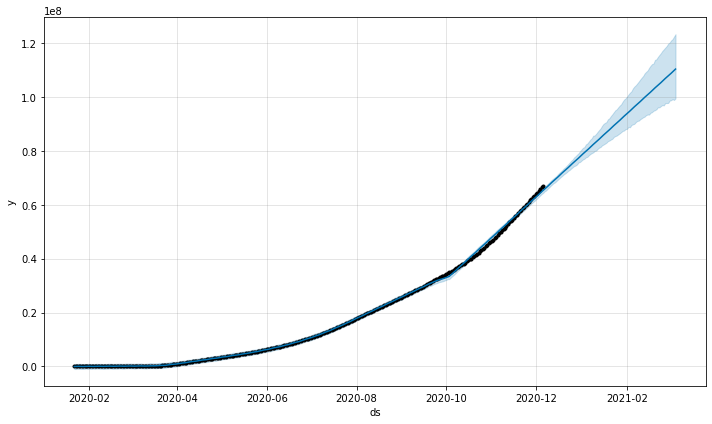

In [52]:
confirmed_forecast_plot=model.plot(forecast_confirmed)

# Prediction Of Deaths

In [54]:
death.columns=['ds','y']
death['ds']=pd.to_datetime(death['ds'])
death

,ds,y
0,2020-01-22,17.00
1,2020-01-23,18.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
5,2020-01-27,82.00
6,2020-01-28,131.00
7,2020-01-29,133.00
8,2020-01-30,171.00
9,2020-01-31,213.00


In [55]:
model = Prophet(interval_width=0.95)
model.fit(death)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future= model.make_future_dataframe(periods=150)
future.tail(100)

,ds
370,2021-01-26
371,2021-01-27
372,2021-01-28
373,2021-01-29
374,2021-01-30
375,2021-01-31
376,2021-02-01
377,2021-02-02
378,2021-02-03
379,2021-02-04


In [58]:
forecast_deaths=model.predict(future)

In [59]:
forecast_deaths[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1324.48,-19927.14,16718.16
1,2020-01-23,-367.07,-18932.21,18043.85
2,2020-01-24,463.12,-18901.29,18966.29
3,2020-01-25,435.53,-18252.81,19928.09
4,2020-01-26,-747.74,-19184.24,18186.02
5,2020-01-27,-2409.99,-20396.19,14608.43
6,2020-01-28,-1605.99,-21237.40,18199.05
7,2020-01-29,-547.79,-19053.89,17818.67
8,2020-01-30,409.63,-18031.69,18187.83
9,2020-01-31,1239.81,-18069.67,19971.81


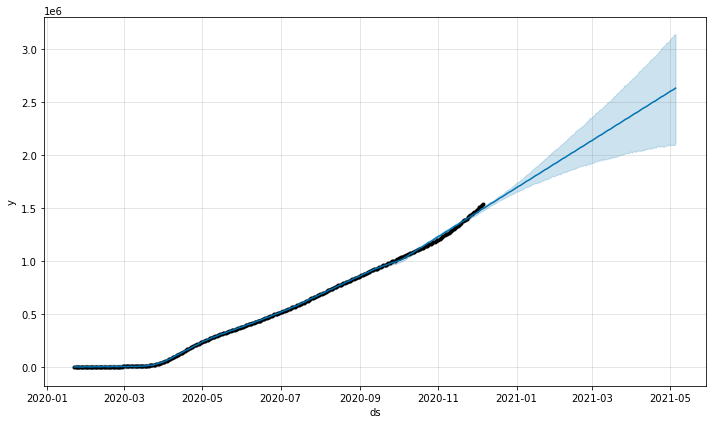

In [61]:
death_forecast_plot=model.plot(forecast_deaths)